Proyek Analisis Data : Air Quality Dataset

- Nama : Rizal Aji Santoso
- Email : rizalsantos148@gmail.com
- ID Dicoding : rizalajisantos0

Menentukan Pertanyaan

1. Apakah terdapat hubungan antara curah hujan dengan jumlah polutan (PM10, SO2, NO2) di udara distrik Shunyi?

2. Apakah ada korelasi antara kecepatan angin (kolom 'WSPM') di distrik Shunyi dengan polutannya (PM10, SO2, NO2)?

3. Bagaimana tren curah hujan di bulannya?

Import Semua Packages / Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Wrangling

Gathering Data

Mengimpor Table 'Air Quality Dataset'

In [3]:
air_quality_df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
air_quality_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


Assessing Data

Menilai Data

In [4]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
air_quality_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Melihat data yang terduplikasi

In [6]:
print('Jumlah Duplikasi :', air_quality_df.duplicated().sum())

Jumlah Duplikasi : 0


Melihat ringkasan descriptive statistics

In [7]:
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Menampilkan 3 baris data yang memiliki value pada : PM10, SO2, NO2, CO, O3, RAIN yang sangat besar.

In [8]:
top_5_pm10 = air_quality_df.nlargest(3, 'PM10')
top_5_so2 = air_quality_df.nlargest(3, 'SO2')
top_5_no2 = air_quality_df.nlargest(3, 'NO2')
top_5_co = air_quality_df.nlargest(3, 'CO')
top_5_o3 = air_quality_df.nlargest(3, 'O3')
top_5_rain = air_quality_df.nlargest(3, 'RAIN')

print(top_5_pm10)
print(top_5_so2)
print(top_5_no2)
print(top_5_co)
print(top_5_o3)
print(top_5_rain)

          No  year  month  day  hour  PM2.5   PM10    SO2   NO2      CO    O3  \
18620  18621  2015      4   15    20   88.0  999.0    2.0  13.0   300.0  79.0   
34297  34298  2017      1   28     1  637.0  951.0  149.0  81.0  2600.0   8.0   
17355  17356  2015      2   22     3  126.0  920.0    3.0   2.0     NaN  39.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM station  
18620  18.90  1000.0  -1.0   0.0  NNW   4.3  Shunyi  
34297  -1.54  1021.0 -14.8   0.0   NE   0.7  Shunyi  
17355  -5.00  1020.0 -23.5   0.0    W   3.5  Shunyi  
          No  year  month  day  hour  PM2.5   PM10    SO2   NO2      CO    O3  \
25777  25778  2016      2    8     1  816.0    NaN  239.0  75.0  1700.0   5.0   
8995    8996  2014      3   10    19  129.0  147.0  207.0  98.0  1800.0  26.0   
8625    8626  2014      2   23     9  206.0  210.0  203.0  79.0  3900.0   4.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
25777  -3.9  1011.4 -13.8   0.0  NNE   1.1  Shunyi  
8995    4.9  1016.7  -3.2   

Cleaning Data

Melihat data yang mengalami missing value

In [9]:
air_quality_df[air_quality_df.PM10.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
31,32,2013,3,2,7,13.0,NaN,12.0,31.0,700.0,49.0,-2.7,1032.3,-16.4,0.0,N,1.3,Shunyi
88,89,2013,3,4,16,13.0,NaN,8.0,21.0,500.0,84.0,14.9,1017.9,-13.3,0.0,SSW,3.0,Shunyi
204,205,2013,3,9,12,NaN,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,NaN,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,NaN,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,NaN,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


Karena data merupakan timeseries, maka metode digunakan metode interpolation untuk mengatasi missing value

In [10]:
air_quality_df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [11]:
air_quality_df.info()
air_quality_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    35064 non-null  float64
 6   PM10     35064 non-null  float64
 7   SO2      35064 non-null  float64
 8   NO2      35064 non-null  float64
 9   CO       35064 non-null  float64
 10  O3       35064 non-null  float64
 11  TEMP     35064 non-null  float64
 12  PRES     35064 non-null  float64
 13  DEWP     35064 non-null  float64
 14  RAIN     35064 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35064 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


No           0
year         0
month        0
day          0
hour         0
PM2.5        0
PM10         0
SO2          0
NO2          0
CO           0
O3           0
TEMP         0
PRES         0
DEWP         0
RAIN         0
wd         483
WSPM         0
station      0
dtype: int64

Melihat data null pada kolom 'wd'

In [12]:
air_quality_df[air_quality_df.wd.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6764,6765,2013,12,7,20,380.000000,378.000000,44.000000,121.000000,8500.000000,4.000000,-0.1,1016.700000,-2.20,0.0,NaN,0.10,Shunyi
16416,16417,2015,1,14,0,215.000000,215.000000,36.000000,86.000000,2800.000000,17.000000,-4.0,1027.900000,-8.10,0.0,NaN,0.90,Shunyi
16760,16761,2015,1,28,8,7.000000,7.000000,2.000000,15.000000,300.000000,48.000000,-5.0,1029.500000,-20.95,0.0,NaN,2.65,Shunyi
16790,16791,2015,1,29,14,32.000000,32.000000,4.000000,31.000000,600.000000,58.000000,3.5,1022.000000,-18.05,0.0,NaN,4.80,Shunyi
16812,16813,2015,1,30,12,15.000000,15.000000,2.000000,17.000000,500.000000,63.000000,-1.0,1033.333333,-21.70,0.0,NaN,1.50,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34872,34873,2017,2,21,0,104.333333,124.666667,33.333333,86.666667,2833.333333,3.666667,-3.2,1030.600000,-13.20,0.0,NaN,0.20,Shunyi
34903,34904,2017,2,22,7,82.000000,82.000000,4.000000,56.000000,1600.000000,8.000000,-3.4,1018.300000,-5.30,0.0,NaN,0.10,Shunyi
34944,34945,2017,2,24,0,74.000000,80.000000,30.000000,102.000000,2100.000000,2.000000,-1.1,1022.800000,-9.20,0.0,NaN,0.20,Shunyi
34946,34947,2017,2,24,2,71.000000,86.000000,24.000000,99.000000,2200.000000,2.000000,-2.3,1023.000000,-8.00,0.0,NaN,0.00,Shunyi


Mengganti value data null pada kolom wd menjadi 'NA'

In [13]:
air_quality_df.fillna(value = 'NA', inplace = True)
air_quality_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [14]:
air_quality_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.437962,99.271936,13.445971,44.094695,1197.904660,54.218810,13.375531,1013.071937,2.450821,0.061010,1.807784
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.500282,90.579040,19.463506,30.907747,1162.920922,54.592684,11.484913,10.177512,13.732520,0.761118,1.287542
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,20.000000,400.000000,10.000000,3.000000,1004.700000,-8.900000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,900.000000,42.000000,14.400000,1012.800000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,139.000000,16.000000,62.000000,1500.000000,76.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


Exploratory Data Analisis(EDA)

Melihat distribusi dan korelasi dari tiap kolom

array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

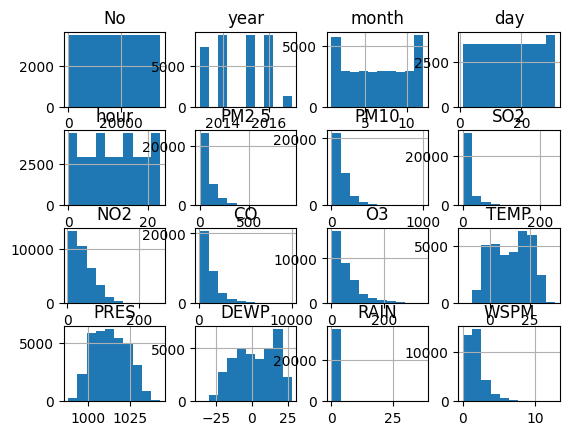

In [15]:
air_quality_df.hist()

In [16]:
air_quality_df[[ 'RAIN','WSPM','TEMP', 'PRES', 'DEWP','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].corr()


,RAIN,WSPM,TEMP,PRES,DEWP,PM2.5,PM10,SO2,NO2,CO,O3
RAIN,1.000000,0.028889,0.039382,-0.063945,0.087417,-0.008090,-0.023373,-0.038928,-0.051217,-0.003677,0.023954
WSPM,0.028889,1.000000,0.062910,0.016784,-0.256374,-0.268076,-0.189076,-0.122205,-0.382243,-0.285803,0.309847
TEMP,0.039382,0.062910,1.000000,-0.825859,0.823959,-0.120102,-0.085737,-0.314040,-0.295962,-0.279106,0.566882
PRES,-0.063945,0.016784,-0.825859,1.000000,-0.762659,0.002149,-0.029982,0.217523,0.149024,0.133241,-0.418559
DEWP,0.087417,-0.256374,0.823959,-0.762659,1.000000,0.118777,0.082564,-0.262214,-0.080150,-0.020542,0.286705
PM2.5,-0.008090,-0.268076,-0.120102,0.002149,0.118777,1.000000,0.889705,0.461935,0.635951,0.776079,-0.126368
PM10,-0.023373,-0.189076,-0.085737,-0.029982,0.082564,0.889705,1.000000,0.462236,0.640850,0.696424,-0.107019
SO2,-0.038928,-0.122205,-0.314040,0.217523,-0.262214,0.461935,0.462236,1.000000,0.505000,0.502439,-0.138480
NO2,-0.051217,-0.382243,-0.295962,0.149024,-0.080150,0.635951,0.640850,0.505000,1.000000,0.653669,-0.413245
CO,-0.003677,-0.285803,-0.279106,0.133241,-0.020542,0.776079,0.696424,0.502439,0.653669,1.000000,-0.244020


Melihat rata-rata curah hujan di tiap tahun dan bulan lalu mengurutkan dari yang tertinggi, serta melihat pengaruhnya terhadap jumlah polutan

In [17]:
air_quality_df.groupby(['year', 'month'])[['RAIN','TEMP', 'PRES', 'DEWP','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().sort_values(by=['RAIN'], ascending=False)


RAIN       TEMP         PRES       DEWP       PM2.5  \
year month                                                            
2015 7      0.330645  26.247581  1001.987366  18.521505   62.158602   
2016 7      0.274328  27.250672  1001.333737  20.537769   63.694220   
2013 7      0.268414  27.130511   998.123656  20.698253   61.924731   
2014 9      0.214444  20.295972  1011.101111  13.420972   68.202778   
2015 6      0.164583  24.247500  1001.031111  14.485556   64.653889   
     9      0.157639  20.387500  1012.051528  13.990694   48.625694   
2013 6      0.154306  23.644167  1002.345417  18.493611  105.725000   
2016 6      0.150139  25.093889  1001.444722  14.937083   56.136111   
2014 7      0.122849  28.156317  1000.888710  19.016801   95.292473   
2013 8      0.120430  26.535484  1001.395161  20.091801   60.415323   
2014 6      0.106111  25.006806  1002.440972  15.513611   55.820833   
2016 10     0.092742  13.054089  1017.818862   6.994489   81.392473   
2014 8      0.077151  26.233468  1004.920027  17.160618   62.567339   
2016 5      0.076478  21.130376  1006.203629   6.416667   56.848790   
2015 8      0.075000  26.007661  1004.104301  18.585484   43.665995   
2016 9      0.072778  21.517679  1009.998210  13.992431   54.666667   
2015 11     0.059583   3.078472  1024.189028  -1.350278  116.900000   
2013 9      0.058472  20.280278  1011.570694  14.119028   72.483333   
2015 4      0.050417  15.544444  1011.577197   1.265139   74.112500   
2016 8      0.050269  27.130242  1004.246909  19.320833   46.646505   
2014 5      0.048118  21.746102  1003.829973   6.144220   64.373790   
2015 5      0.045161  21.203831  1004.141129   6.501747   58.140457   
2014 4      0.020417  17.080833  1012.800000   2.952778   87.926389   
2013 3      0.020296   5.645161  1015.172984  -6.539113  104.636425   
2014 10     0.014247  13.518952  1016.981183   5.627554  108.215054   
2015 2      0.013318   0.957589  1020.766667 -13.021726   91.833333   
2016 2      0.013218   0.864799  1023.307184 -14.889655   49.274425   
2013 4      0.012778  12.219722  1010.621806  -3.301111   57.781250   
2015 10     0.012231  13.809140  1016.396237   4.421909   75.273522   
2013 10     0.010484  12.770027  1018.578495   5.213441   83.161290   
2016 4      0.007639  16.272639  1008.516667  -1.042083   75.627778   
2014 2      0.005952  -0.348214  1025.048958  -9.998214  161.186756   
2017 2      0.005506   1.986161  1022.753274 -13.280655   70.232143   
2015 12     0.003091  -0.438710  1024.818280  -7.968280  155.458333   
2016 11     0.002083   4.030278  1021.308194  -4.178056   93.983333   
2013 5      0.002016  21.645161  1005.403226   8.194624   79.924059   
2016 1      0.001613  -4.618011  1026.777285 -18.077554   70.515457   
2015 3      0.001478   8.353360  1017.616443  -9.694624   87.923387   
2014 11     0.001250   5.730556  1014.856806  -5.956944   81.267639   
2015 1      0.000403  -1.241398  1024.146237 -14.571774   99.037366   
2014 3      0.000269   9.652823  1016.156317  -5.954032   97.760753   
2016 3      0.000000   8.750538  1017.473522  -8.638441   97.715726   
2014 12     0.000000  -1.353898  1019.316398 -16.556317   51.856317   
     1      0.000000  -0.613710  1022.676210 -12.799059   93.642473   
2013 12     0.000000  -0.208333  1022.469355 -14.042608   64.454301   
     11     0.000000   5.678611  1019.300139  -7.416111   66.957639   
2016 12     0.000000  -0.170565  1024.215726  -9.852151  118.427419   
2017 1      0.000000  -1.823124  1025.636201 -13.235148  117.868280   

                  PM10        SO2        NO2           CO          O3  
year month                                                             
2015 7       71.894489   3.139113  28.692204   777.217742   92.930780  
2016 7       71.139113   2.337366  25.710349   822.244624   95.060484  
2013 7       68.613575   5.869334  30.930844  1279.198253   80.415035  
2014 9       83.513889   4.440278  35.241250   940.000000   52.255278  
2015 6       78.855278   4.430556

Melihat rata-rata kecepatan angin di tiap tahun dan bulan lalu mengurutkan dari yang tertinggi, serta melihat pengaruhnya terhadap jumlah polutan

In [18]:
air_quality_df.groupby(['year', 'month'])[['WSPM', 'TEMP', 'PRES', 'DEWP','PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean().sort_values(by=['WSPM'], ascending=False)


WSPM       TEMP         PRES       DEWP       PM2.5  \
year month                                                            
2013 4      2.537222  12.219722  1010.621806  -3.301111   57.781250   
2016 2      2.467816   0.864799  1023.307184 -14.889655   49.274425   
     4      2.412083  16.272639  1008.516667  -1.042083   75.627778   
2014 5      2.338978  21.746102  1003.829973   6.144220   64.373790   
     12     2.285215  -1.353898  1019.316398 -16.556317   51.856317   
2016 5      2.239919  21.130376  1006.203629   6.416667   56.848790   
     1      2.235753  -4.618011  1026.777285 -18.077554   70.515457   
2015 5      2.223858  21.203831  1004.141129   6.501747   58.140457   
     4      2.177083  15.544444  1011.577197   1.265139   74.112500   
2017 2      2.132589   1.986161  1022.753274 -13.280655   70.232143   
2015 3      2.119086   8.353360  1017.616443  -9.694624   87.923387   
2013 3      2.070833   5.645161  1015.172984  -6.539113  104.636425   
     5      2.054839  21.645161  1005.403226   8.194624   79.924059   
     11     1.994722   5.678611  1019.300139  -7.416111   66.957639   
     12     1.911156  -0.208333  1022.469355 -14.042608   64.454301   
2016 3      1.899194   8.750538  1017.473522  -8.638441   97.715726   
2014 3      1.894892   9.652823  1016.156317  -5.954032   97.760753   
2015 2      1.870610   0.957589  1020.766667 -13.021726   91.833333   
2014 4      1.845278  17.080833  1012.800000   2.952778   87.926389   
2017 1      1.841263  -1.823124  1025.636201 -13.235148  117.868280   
2016 6      1.826389  25.093889  1001.444722  14.937083   56.136111   
2015 6      1.802361  24.247500  1001.031111  14.485556   64.653889   
2014 7      1.778629  28.156317  1000.888710  19.016801   95.292473   
2016 7      1.710618  27.250672  1001.333737  20.537769   63.694220   
2015 12     1.707392  -0.438710  1024.818280  -7.968280  155.458333   
2014 1      1.672312  -0.613710  1022.676210 -12.799059   93.642473   
     6      1.641389  25.006806  1002.440972  15.513611   55.820833   
2015 10     1.640591  13.809140  1016.396237   4.421909   75.273522   
2016 11     1.639167   4.030278  1021.308194  -4.178056   93.983333   
     8      1.633333  27.130242  1004.246909  19.320833   46.646505   
2015 1      1.630712  -1.241398  1024.146237 -14.571774   99.037366   
2013 7      1.622043  27.130511   998.123656  20.698253   61.924731   
2014 8      1.621640  26.233468  1004.920027  17.160618   62.567339   
     2      1.619494  -0.348214  1025.048958  -9.998214  161.186756   
2013 8      1.618145  26.535484  1001.395161  20.091801   60.415323   
2015 7      1.576613  26.247581  1001.987366  18.521505   62.158602   
2014 11     1.566944   5.730556  1014.856806  -5.956944   81.267639   
2016 9      1.550000  21.517679  1009.998210  13.992431   54.666667   
2013 6      1.538194  23.644167  1002.345417  18.493611  105.725000   
2015 8      1.533065  26.007661  1004.104301  18.585484   43.665995   
     9      1.513194  20.387500  1012.051528  13.990694   48.625694   
     11     1.503750   3.078472  1024.189028  -1.350278  116.900000   
2016 10     1.502554  13.054089  1017.818862   6.994489   81.392473   
     12     1.464247  -0.170565  1024.215726  -9.852151  118.427419   
2013 9      1.387917  20.280278  1011.570694  14.119028   72.483333   
     10     1.380780  12.770027  1018.578495   5.213441   83.161290   
2014 9      1.365972  20.295972  1011.101111  13.420972   68.202778   
     10     1.215591  13.518952  1016.981183   5.627554  108.215054   

                  PM10        SO2        NO2           CO          O3  
year month                                                             
2013 4       83.029167  17.333270  40.009025  1016.790972   56.347833  
2016 2       54.706178  12.582615  29.627874   860.704023   47.226293  
     4      109.309722   8.841667  39.877083   790.486111   63.871528  
2014 5      109.691935  11.564113  53.189893   880.645161   89.649194  
     12      87.200941  23.469086

Visualization dan Explanatory Analysis

1. Apakah terdapat hubungan antara curah hujan dengan jumlah polutan (PM10, SO2, NO2) di udara distrik Shunyi?

In [19]:
air_quality_df[[ 'RAIN','PM10', 'SO2', 'NO2']].corr()

,RAIN,PM10,SO2,NO2
RAIN,1.000000,-0.023373,-0.038928,-0.051217
PM10,-0.023373,1.000000,0.462236,0.640850
SO2,-0.038928,0.462236,1.000000,0.505000
NO2,-0.051217,0.640850,0.505000,1.000000


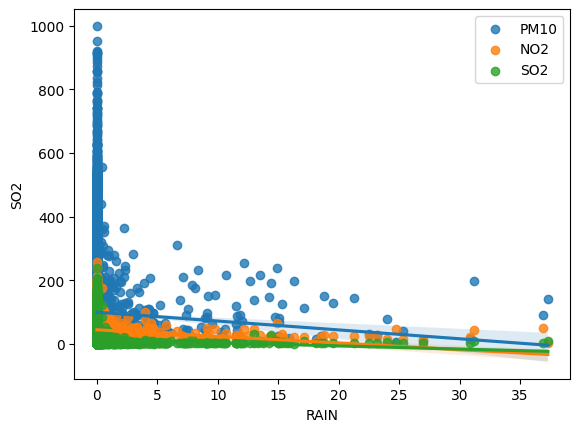

In [20]:
sns.regplot(x='RAIN', y='PM10', data = air_quality_df,label='PM10')
sns.regplot(x='RAIN', y='NO2', data = air_quality_df,label='NO2')
sns.regplot(x='RAIN', y='SO2', data = air_quality_df,label='SO2')
plt.legend()
plt.show()

2. Apakah ada korelasi antara kecepatan angin (kolom 'WSPM') di distrik Shunyi dengan polutannya (PM10, SO2, NO2)?

In [21]:
air_quality_df[[ 'WSPM','PM10', 'SO2', 'NO2']].corr()

,WSPM,PM10,SO2,NO2
WSPM,1.000000,-0.189076,-0.122205,-0.382243
PM10,-0.189076,1.000000,0.462236,0.640850
SO2,-0.122205,0.462236,1.000000,0.505000
NO2,-0.382243,0.640850,0.505000,1.000000


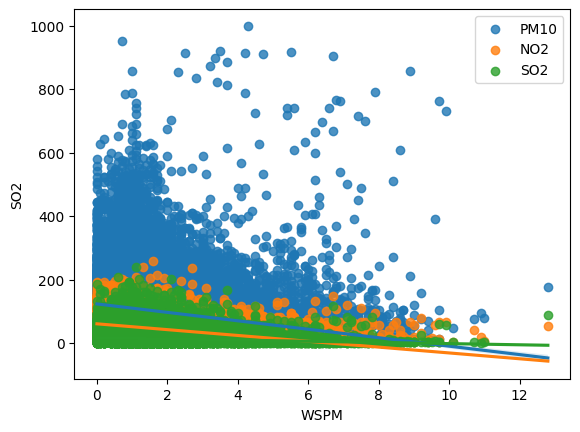

In [22]:
sns.regplot(x='WSPM', y='PM10', data = air_quality_df,label='PM10')
sns.regplot(x='WSPM', y='NO2', data = air_quality_df,label='NO2')
sns.regplot(x='WSPM', y='SO2', data = air_quality_df,label='SO2')
plt.legend()
plt.show()

3. Bagaimana tren curah hujan di tiap bulannya?

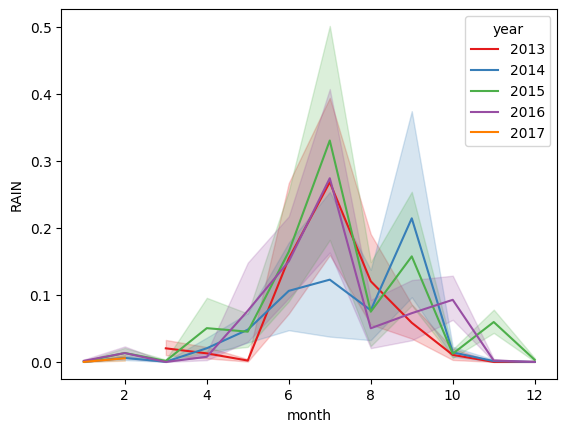

In [23]:
sns.lineplot(x=air_quality_df['month'], y=air_quality_df['RAIN'], hue=air_quality_df['year'], palette='Set1')
plt.show()

Conclusion

1. Apakah terdapat hubungan antara curah hujan dengan jumlah polutan (PM10, SO2, NO2) di udara distrik Shunyi?

Terdapat hubungan yang lemah antara curah hujan di Distrik Shunyi dengan tingkat jumlah polutan. Selain itu curah hujan memiliki hubungan negatif dengan tingkat polutan. Hal ini menandakan bahwa semakin tinggi curah hujan di distrik Shunyi maka jumlah polutan di distrik tersebut akan sedikit berkurang.

2. Apakah ada korelasi antara kecepatan angin (kolom 'WSPM') di distrik Shunyi dengan polutannya (PM10, SO2, NO2)?

Kecepatan angin mempunyai pengaruh yang sedikit lebih kuat (terutama pada polutan berjenis NO2) dibandingkan dengan hujan. Kecepatan angin juga memiliki hubungan negatif dengan tingkat polutan yang menandakan bahwa semakin kuat hembusan angin di Distrik Shunyi, maka jumlah polutan di distrik tersebut akan semakin sedikit.

3. Bagaimana tren curah hujan di tiap bulannya?

Curah hujan di Distrik Shunyi cenderung tinggi dari bulan ke 6 sampai bulan 9.

In [24]:
air_quality_df.to_csv('air_quality_df', index=False)